In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plumed
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math

In [2]:
# Import data from the colvar files
data_hills = plumed.read_as_pandas("data/HILLS")

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1574/4087225103.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  data_hills = plumed.read_as_pandas("data/HILLS")


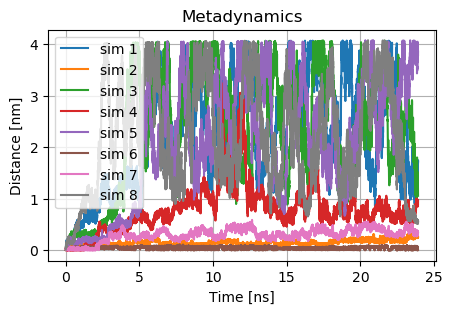

In [5]:
plt.rcParams["figure.figsize"] = (5, 3)
plt.plot(data_hills["time"][0::8]*0.001, data_hills["Ox_rho"][0::8], label="sim 1")
plt.plot(data_hills["time"][1::8]*0.001, data_hills["Ox_rho"][1::8], label="sim 2")
plt.plot(data_hills["time"][2::8]*0.001, data_hills["Ox_rho"][2::8], label="sim 3")
plt.plot(data_hills["time"][3::8]*0.001, data_hills["Ox_rho"][3::8], label="sim 4")
plt.plot(data_hills["time"][4::8]*0.001, data_hills["Ox_rho"][4::8], label="sim 5")
plt.plot(data_hills["time"][5::8]*0.001, data_hills["Ox_rho"][5::8], label="sim 6")
plt.plot(data_hills["time"][6::8]*0.001, data_hills["Ox_rho"][6::8], label="sim 7")
plt.plot(data_hills["time"][7::8]*0.001, data_hills["Ox_rho"][7::8], label="sim 8")
plt.grid()
plt.title("Metadynamics")
plt.ylabel("Distance [nm]")
plt.xlabel("Time [ns]")
plt.legend(loc="best")

# Reconstruct the free energy profile

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_3251/3395034876.py:3: UserWarning: cannot load PLUMED instance, conversions will not be available
  fes = plumed.read_as_pandas("fes.dat")


Text(0, 0.5, 'Free energy [kcal/mol]')

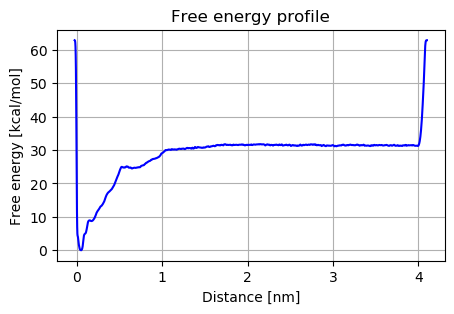

In [8]:
# plumed sum_hills --hills all_HILLS --mintozero

fes = plumed.read_as_pandas("fes.dat")
plt.plot(fes["Ox_rho"], fes["file.free"]/4.184, 'b')
plt.grid()
plt.title("Free energy profile")
plt.xlabel("Distance [nm]")
plt.ylabel("Free energy [kcal/mol]")

# FE as a function of time

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_3251/1423521810.py:3: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_3251/1423521810.py:3: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_3251/1423521810.py:3: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_3251/1423521810.py:3: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_3251/1423521810.py:3: UserWarning: cannot load PLUMED instance, conversions will not be avail

Text(0, 0.5, 'Free energies [kcal/mol]')

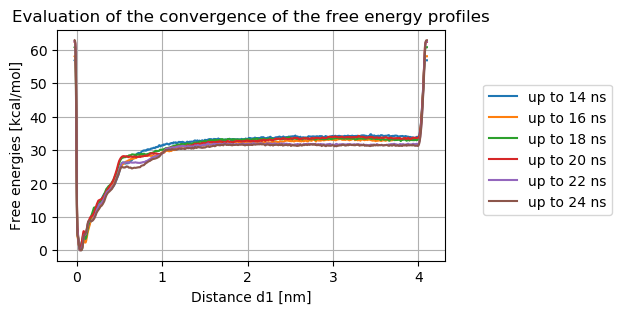

In [11]:
for i in range(4, 10):   
    # import fes file into pandas dataset
    data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
    plt.plot(data["Ox_rho"],data["file.free"]/4.184, label="up to " + str(6 + 2*i) + " ns")

plt.grid()
plt.title("Evaluation of the convergence of the free energy profiles")
plt.legend(loc=(1.1, 0.2))
plt.xlabel("Distance d1 [nm]")
plt.ylabel("Free energies [kcal/mol]")

# Standard binding free energy as a function of time
$$
\Delta G_b^0=\Delta G_{\text{meta}}-kT\ln(\pi R_{\text{cyl}}^2C_0)
$$

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_3251/3654197625.py:11: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")


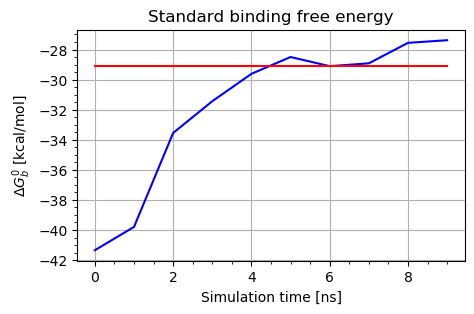

In [22]:
# This is another useful quantity to keep track of.
# We track the free energy difference as a function of time.
# The probability of a CV to stay in a predetermined range is the integral of the probability density
# over that range. The probability density is exp(-beta * F(s)) 

DeltaG=[]
kT = 1
# cycle on free-energy profiles
for i in range(0, 10):   
    # import fes file into pandas dataset
    data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
    # find minimum value of fes
    minf = min(data["file.free"])
    # plot fes
    F0=0.0; F1=0.0
    for j in range(0, len(data["Ox_rho"])):
        d = data["Ox_rho"][j]
        # calculate probability
        p = math.exp((-data["file.free"][j]+minf)/kT)
        # integrate in the two basins
        if(0.01<=d<=0.07): F0 += p
        if(2.00<d<=3.50): F1 += p
    # calculate free energy difference and add to list. Correction funnel
    R_cyl = 2
    C_0 = 1/1660 
    DeltaG.append(-kT*math.log(F0/F1) - 2.58*math.log(math.pi*R_cyl*R_cyl*C_0))   

         
# plot
plt.plot(np.array(DeltaG)/4.184, "b") 
# experimental value 
RT = 0.00831*310/4.184
k_d = 12.4*1e-6
experiment = np.empty(len(DeltaG))
experiment.fill(RT*math.log(k_d))
plt.plot(experiment, "r") 
# labels
plt.xlabel("Simulation time [ns]")
plt.ylabel(r"$\Delta G^0_b$ [kcal/mol]")
plt.title("Standard binding free energy")
plt.grid()
plt.minorticks_on()


In [26]:
2.58*math.log(k_d)/4.184

-6.9666253203182285

In [ ]:
kT = 1
w_0 = [math.exp(data_colvar0["metad.rbias"][i])/kT for i in range(0, len(data_colvar0["metad.rbias"]))]
w_1 = [math.exp(data_colvar1["metad.rbias"][i])/kT for i in range(0, len(data_colvar1["metad.rbias"]))]
w_2 = [math.exp(data_colvar2["metad.rbias"][i])/kT for i in range(0, len(data_colvar2["metad.rbias"]))]
w_3 = [math.exp(data_colvar3["metad.rbias"][i])/kT for i in range(0, len(data_colvar3["metad.rbias"]))]

w = np.concatenate((w_0, w_1, w_2, w_3), axis=None)
d1_colvar = np.concatenate((data_colvar0["d1"], data_colvar1["d1"], data_colvar2["d1"], data_colvar3["d1"]), axis=None)


val_bias, bins_bias, patches_bias = plt.hist(d1_colvar, bins=100, density=True, color='r', label="biased distribution")
kT = 1
val_unbias, bins_unbias, patches_unbias = plt.hist(d1_colvar, bins=100, weights=w, density=True, alpha = 0.5, color= 'b', label="unbiased distribution")

In [2]:
def get_fes(bins, val):
    F = []
    s = []
    mesh = (bins[1] - bins[0])/2
    i = 0
    min = -kT * math.log(val[0])

    while val[i] != 0 and i<len(val)-1:
        F.append(-kT * math.log(val[i]))
        s.append(bins[i] + mesh)
        if F[i] < min:
            min = F[i]
        i = i + 1

    # Remove the offset
    F = F - min*np.ones(len(F))
    return F, s

In [ ]:
F = []
dist = []
F, dist = get_fes(bins_unbias, val_unbias)

data_fes = plumed.read_as_pandas("fes.dat")
plt.plot(data_fes["d1"], data_fes["file.free"], 'b',label="fes from sum_hills")

# From the fes.dat file (elaboration of the HILLS file, via sum_hills)
plt.plot(dist, F, 'r',label="reweighting using metad.rbias")
plt.grid()
plt.legend(loc="best")
plt.title("sum_hills reconstruction vs reweighted reconstruction")
plt.xlabel("O-Ca2+ distance [nm]")
plt.ylabel("Free energy surface")